<a href="https://colab.research.google.com/github/Kyoka-Trepka-UVA/DS-1002/blob/main/06_Pandas_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas exercises 1
Lorenzo Romulo

Kyoka Trepka
1. Import dependencies

In [47]:
import pandas as pd

---

In [48]:
list = [98, 24, 46, 87, 33]

2. Convert `list` to a pandas series using `pd.Series`

In [49]:
series = pd.Series(list)


3. Take the above series and add an index that starts at 2 and steps by 3

In [50]:
index = range(2, 2 + 3*len(list), 3)
series.index = index
series

2     98
5     24
8     46
11    87
14    33
dtype: int64

4. Create a dictionary of 4 names, ages, and careers   
Convert this dictionary to a pandas dataframe: `df`.  
Print the dataframe.

In [51]:
data = {
    'name': ['Lorenzo', 'Kyoka', 'Stone', 'Tony'],
    'age': [30, 25, 35, 28],
    'career': ['Unemployed', 'Japanese Tutor', 'Doctor', 'Computer Engineer']
}

df = pd.DataFrame(data)
df



,name,age,career
0,Lorenzo,30,Unemployed
1,Kyoka,25,Japanese Tutor
2,Stone,35,Doctor
3,Tony,28,Computer Engineer


5. Name the index of `df` 'participant_id'.  
Print `df`.

In [52]:
df.index.name = 'participant_id'
df

,name,age,career
participant_id,,,
0,Lorenzo,30,Unemployed
1,Kyoka,25,Japanese Tutor
2,Stone,35,Doctor
3,Tony,28,Computer Engineer


6. Use a pandas function to determine the data types of the columns of `df`.

In [53]:
column_data_types = df.dtypes

7. Using bracket notation, reference column `name`

In [54]:
name_column_bracket = df['name']

8. Using dot notation, reference column `name`

In [55]:
name_column_dot = df.name

8. Reference column `name` and have it returned in a dataframe.

In [56]:
name_column_dataframe = df[['name']]

9. Show the 3rd element in column `career`.

In [57]:
third_element_career = df['career'].iloc[2]
third_element_career

'Doctor'

10.  Load the `iris` dataset that we used in class.  Use `iris` as the name of your data frame.

In [58]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


11.  What is the correlation between the variables `sepal_length` and `sepal_width` for all the irises?

In [59]:
overall_correlation = iris[['sepal_length','sepal_width']].corr()
overall_correlation


,sepal_length,sepal_width
sepal_length,1.00000,-0.11757
sepal_width,-0.11757,1.00000


12.  Which of the three species has the highest correlation between `sepal_length` and `sepal_width`?  Show any calculations you use to support your answer.

In [60]:
def calculate_correlation(group):
    return group[['sepal_length', 'sepal_width']].corr()
correlation_by_species = iris.groupby('species').apply(calculate_correlation)
correlation_by_species

sepal_length  sepal_width
species                                           
setosa     sepal_length      1.000000     0.742547
           sepal_width       0.742547     1.000000
versicolor sepal_length      1.000000     0.525911
           sepal_width       0.525911     1.000000
virginica  sepal_length      1.000000     0.457228
           sepal_width       0.457228     1.000000

the species with the highest correlation between sepal_length and sepal_width is with the setosa species

13.  Among the four variables, the two that are most negatively correlated (overall) are `sepal_width` and `petal_length`.  (How do we know this?)  Determine the same thing but for each species separately:  for each species, which two variables have the most negative (or the least positive) correlation?  Again, include calculations to support your answer.

For setosa, the lowest correlated pair is sepal_width and petal_length with 0.177700

for versicolor, the lowest correlated pair is sepal_length and sepal_width with 0.525911

for Virginica, the lowest coreelated pair is sepal_length and petal_width with 0.281108

In [61]:
species_corr_styled = {}
for species in iris['species'].unique():
    species_data = iris[iris['species'] == species]
    species_corr = species_data.drop(columns='species').corr()
    species_corr_styled[species] = species_corr.style.background_gradient(cmap="Spectral", axis=None)
species_corr_styled['setosa']


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.742547,0.267176,0.278098
sepal_width,0.742547,1.000000,0.177700,0.232752
petal_length,0.267176,0.177700,1.000000,0.331630
petal_width,0.278098,0.232752,0.331630,1.000000


In [62]:
species_corr_styled = {}
for species in iris['species'].unique():
    species_data = iris[iris['species'] == species]
    species_corr = species_data.drop(columns='species').corr()
    species_corr_styled[species] = species_corr.style.background_gradient(cmap="Spectral", axis=None)
species_corr_styled['virginica']

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.457228,0.864225,0.281108
sepal_width,0.457228,1.000000,0.401045,0.537728
petal_length,0.864225,0.401045,1.000000,0.322108
petal_width,0.281108,0.537728,0.322108,1.000000


In [63]:
species_corr_styled = {}
for species in iris['species'].unique():
    species_data = iris[iris['species'] == species]
    species_corr = species_data.drop(columns='species').corr()
    species_corr_styled[species] = species_corr.style.background_gradient(cmap="Spectral", axis=None)
species_corr_styled['versicolor']

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.525911,0.754049,0.546461
sepal_width,0.525911,1.000000,0.560522,0.663999
petal_length,0.754049,0.560522,1.000000,0.786668
petal_width,0.546461,0.663999,0.786668,1.000000


14.  Once again, the variables `sepal_width` and `petal_length` are negatively correlated.  But for each individual species, these two variables are positively correlated.  How is this possible?  Explain this phenomenon.  Use a data visualization if it helps.


Because the setosa species has such a wide sepal and short petal length, it puts it to the right of most plots on the graph when they are all combined. Because it has a shorter petal length than the other species, it creates a negative correlational trend when plots of all species are combined.

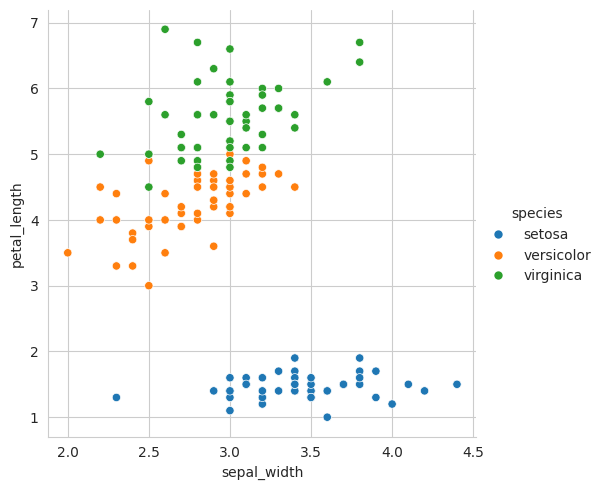

In [71]:
sns.relplot(iris, x='sepal_width', y='petal_length', hue='species')
